In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
customers_ds = '../data_sets/Mall_Customers_ds.csv'

customers_data = pd.read_csv(customers_ds)

In [4]:
customers_data.shape

(200, 5)

In [5]:
customers_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
customers_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
customers_data.replace({
    "Gender": {"Male": 0, "Female": 1}
}, inplace=True)

In [12]:
customers_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [13]:
X = customers_data.iloc[:, [3, 4]].values

In [14]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
# choosing no.of clusters

# wcss ---> within clustor sum of squares

In [ ]:
# finding wcss value for different no.of clusters

wcss = []

for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i,
        init= "k-means++",
        random_state=42
    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

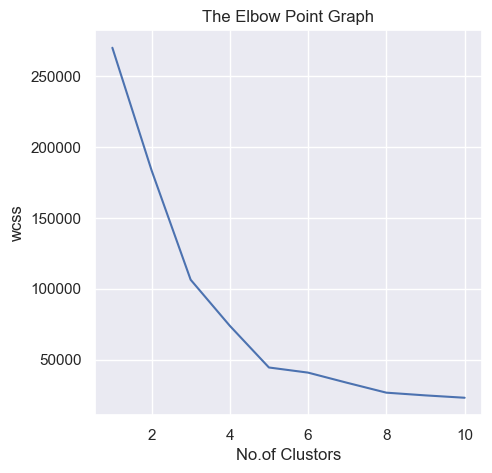

In [ ]:
sns.set_theme()
plt.figure(figsize=(5,5))
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("No.of clusters")
plt.ylabel("wcss")

In [23]:
# optimun no.of clusters = 5

# training the k-means clustering model

In [24]:
kmeans = KMeans(
        n_clusters=5,
        init= "k-means++",
        random_state=0
    )

# return a label for each data point based on their cluster

Y = kmeans.fit_predict(X)

Y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

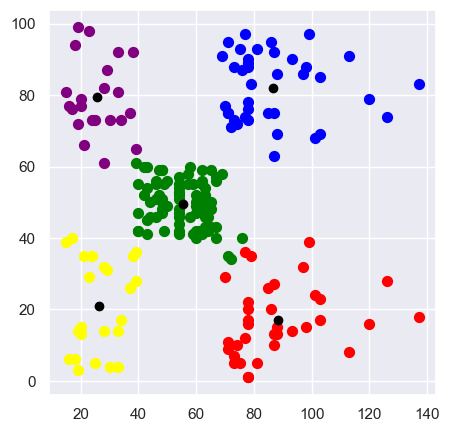

In [33]:
# visualizing the all the clusters

from cProfile import label


plt.figure(figsize=(5, 5))
plt.scatter(
    X[Y == 0, 0],
    X[Y == 0, 1],
    s = 50,
    c='green',
    label="Cluster 1"
)
plt.scatter(
    X[Y == 1, 0],
    X[Y == 1, 1],
    s = 50,
    c='blue',
    label="Cluster 2"
)
plt.scatter(
    X[Y == 2, 0],
    X[Y == 2, 1],
    s = 50,
    c='red',
    label="Cluster 3"
)
plt.scatter(
    X[Y == 3, 0],
    X[Y == 3, 1],
    s = 50,
    c='yellow',
    label="Cluster 4"
)
plt.scatter(
    X[Y == 4, 0],
    X[Y == 4, 1],
    s = 50,
    c='purple',
    label="Cluster 5"
)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', label='Centroids')